<a href="https://colab.research.google.com/github/aisha-colab/Machine-learning-models/blob/main/newHVPS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Convolution neural network

Importing tensorflow and necessary libraries
Transfer Learning

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 
from keras import layers 
from keras import Model 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import os
import PIL
import tensorflow as tf

import keras
from keras import layers
from keras.models import Sequential
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# import the libraries as shown below

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import keras
from keras import backend as k
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
#from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools
%matplotlib inline
import tensorflow as tf

In [ ]:
#Import Libraries

import sys
import numpy as np
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from keras.layers import Conv2D, Flatten, Dense, MaxPool2D,MaxPooling2D, Activation, Dropout, BatchNormalization, Input
import matplotlib.pyplot as plt
#from keras.optimizers import Adam
import itertools  

In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from keras.preprocessing.image import ImageDataGenerator 
from keras import layers 
from keras import Model 
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
import os
import PIL
import tensorflow as tf

#from tensorflow import keras
from keras import layers
from keras.models import Sequential

Unzip the airlab file

In [ ]:
local_zip = '/content/drive/MyDrive/airlab.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/airlab/HVPS'

splitfolders.ratio(input_folder, output='HVPS', seed=42, ratio=(.7, .2, .1), group_prefix=None)


Copying files: 1409 files [00:00, 8771.36 files/s]


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_data_path = '/content/HVPS/train'
valid_data_path = '/content/HVPS/val'
test_data_path = '/content/HVPS/test'

In [ ]:
# Define Input Parameters
shape = (224, 224)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

In [ ]:
#train_datagen = ImageDataGenerator(rescale = 1./255, 
                                 #rotation_range = 30, 
                                 #width_shift_range = 0.2,
                                 #height_shift_range = 0.2,
                                 #shear_range = 0.2,
                                 #zoom_range = 0.2,
                                 #horizontal_flip = True)

#test_datagen =  ImageDataGenerator(rescale = 1. / 255,
                                  #horizontal_flip = True)

#train_gen = train_datagen.flow_from_directory('/content/HVPS/train',
                                            #target_size = shape,
                                            #batch_size = batch_size,
                                            #class_mode = 'categorical',
                                            #shuffle = True)

#val_gen = test_datagen.flow_from_directory('/content/HVPS/val',
                                          #target_size = shape,
                                          #batch_size = batch_size,
                                          #class_mode = 'categorical',
                                          #shuffle = False)

#test_gen= test_datagen.flow_from_directory('/content/HVPS/test',
                                          #target_size = shape,
                                          #batch_size = batch_size,
                                          #class_mode = 'categorical',
                                          #shuffle = False)


Found 984 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Found 145 images belonging to 5 classes.


Data augmentation

One of the major reasons for overfitting is that you don’t have enough data to train your network.
Apart from regularization, another very effective way to counter Overfitting is Data Augmentation.
It is the process of artificially creating more images from the images you already have by changing the size, orientation etc of the image.
This can be done in Keras using the ImageDataGenerator instance.
Includes rotation of the image, shifting the image left/right/top/bottom by some amount, flip the image horizontally or vertically, shear or zoom the image etc.
Augmentation has a regularizing effect. Too much of this combined with other forms of regularization (weight L2, dropout, etc.) can cause the net to underfit.
Keras image preprocessing - ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(zoom_range = 0.4)
                                   
                                 
                                 
                          

test_datagen =  ImageDataGenerator()

train_gen = train_datagen.flow_from_directory('/content/HVPS/train',
                                            target_size = shape,
                                            batch_size = batch_size,
                                            class_mode = 'categorical',
                                            shuffle = True)

val_gen = test_datagen.flow_from_directory('/content/HVPS/val',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)

test_gen= test_datagen.flow_from_directory('/content/HVPS/test',
                                          target_size = shape,
                                          batch_size = batch_size,
                                          class_mode = 'categorical',
                                          shuffle = False)


Found 984 images belonging to 5 classes.
Found 280 images belonging to 5 classes.
Found 145 images belonging to 5 classes.


In [ ]:
num_class = test_gen.num_classes
label_class = train_gen.class_indices

print(label_class)

{'Aggregate (AG)': 0, 'Bullet Rosette (BR)': 1, 'Columnar Crystal (CC)': 2, 'Compact particle (CP)': 3, 'Quasi-sphere (QS)': 4}


#Visulization of train dataset by the bar plot

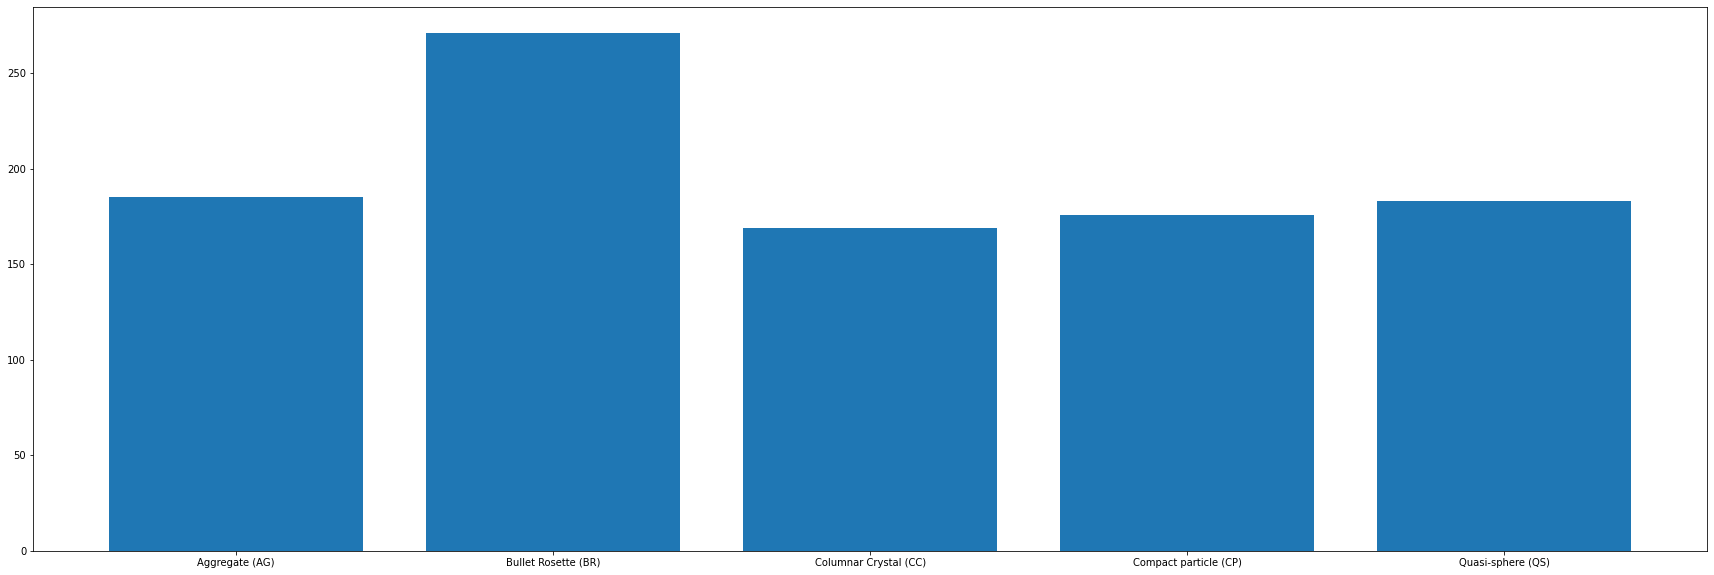

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_gen.classes
from collections import OrderedDict
classes = list(train_gen.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()   

#Visulization of train dataset by the bar plot

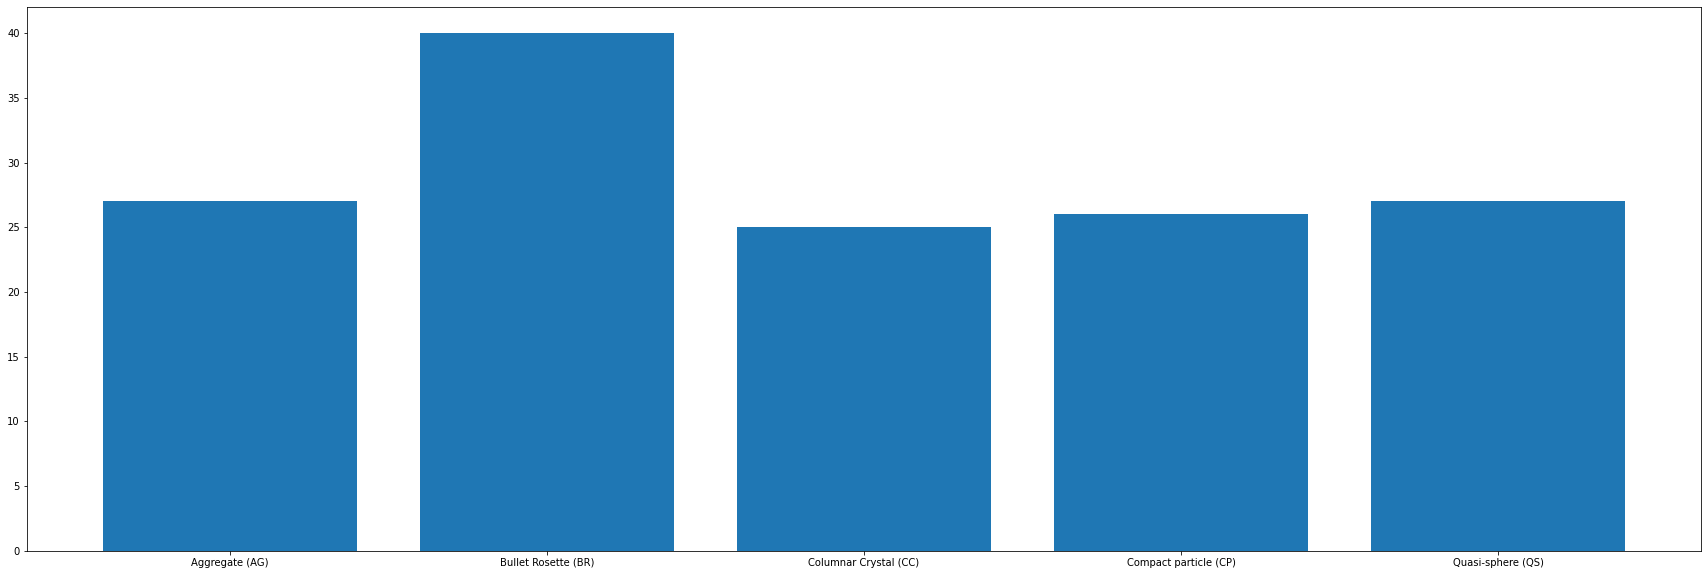

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_test = test_gen.classes
from collections import OrderedDict
classes = list(test_gen.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_test, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(5):
    num_values.append(valdict[i])
plt.figure(figsize=(30,10))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values)
plt.xticks(x, xlabel)
plt.show()   

In [ ]:
# Function for plots images with labels 

def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [ ]:
#Check the training set
imgs, labels = next(train_gen)


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


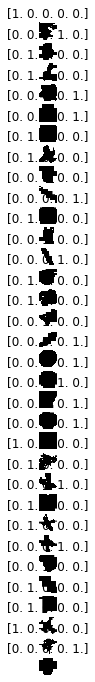

In [ ]:
#Images are shown in the output
plots(imgs, titles=labels)

In [ ]:
#Images Classes with index
print(train_gen.class_indices)


{'Aggregate (AG)': 0, 'Bullet Rosette (BR)': 1, 'Columnar Crystal (CC)': 2, 'Compact particle (CP)': 3, 'Quasi-sphere (QS)': 4}


In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

In [ ]:
model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with multi neuron  
#Here we use softmax activation function which makes our model 
model.add(keras.layers.Dense(5,activation='softmax'))

In [ ]:
#Get summary of the model
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 26, 26, 128)     

In [ ]:
#model = get_model(input_shape=(180, 180, 3), num_classes=5)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 8s 352ms/step - loss: 21.8969 - accuracy: 0.3892 - val_loss: 1.0709 - val_accuracy: 0.5391
Epoch 2/25
20/20 [==============================] - 7s 346ms/step - loss: 0.8808 - accuracy: 0.6594 - val_loss: 1.0573 - val_accuracy: 0.4688
Epoch 3/25
20/20 [==============================] - 7s 341ms/step - loss: 0.7562 - accuracy: 0.6953 - val_loss: 0.6686 - val_accuracy: 0.6641
Epoch 4/25
20/20 [==============================] - 7s 339ms/step - loss: 0.6629 - accuracy: 0.7609 - val_loss: 0.6712 - val_accuracy: 0.7422
Epoch 5/25
20/20 [==============================] - 7s 338ms/step - loss: 0.6673 - accuracy: 0.7579 - val_loss: 0.4918 - val_accuracy: 0.8203
Epoch 6/25
20/20 [==============================] - 7s 347ms/step - loss: 0.5333 - accuracy: 0.7812 - val_loss: 0.4413 - val_accuracy: 0.8125
Epoch 7/25
20/20 [==============================] - 7s 343ms/step - loss: 0.5022 - accuracy: 0.8149 - val_loss: 0.5717 - val_accuracy: 0.7344
Epoch

Another way to compile and train the data by using early stoping and chechpoints

In [ ]:
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from sklearn.model_selection import train_test_split 
#from sklearn import metrics

In [ ]:
#method that can be used to complie 
#model.compile(optimizer = Adam(),
             #loss="categorical_crossentropy",
             #metrics=["acc"])


In [ ]:
#base_path = 'train_model'
#trained_model_path = base_path + 'CNNHVPS_model/'
#model_names = trained_model_path + '.{epoch:02d}-{val_acc:.2f}.h5'


In [ ]:
#another way to fit the model
#earlystopping = EarlyStopping(monitor ="val_loss", 
                              #mode = "auto", patience = 15, 
                              #restore_best_weights = True)

#checkpoint = ModelCheckpoint(model_names, monitor = 'val_loss',
                             #mode = 'auto', verbose = 1,
                             #save_best_only = True)

#history = model.fit(train_gen,
                    #steps_per_epoch = len(train_gen),
                    #validation_data = val_gen,
                    #validation_steps = len(val_gen),
                    #epochs = 100, verbose = 1, callbacks=[checkpoint, earlystopping])

Epoch 1/100
31/31 [==============================] - ETA: 0s - loss: 1.3554 - acc: 0.3872
Epoch 1: val_loss improved from inf to 0.86173, saving model to train_modelCNNHVPS_model/.01-0.63.h5
31/31 [==============================] - 26s 441ms/step - loss: 1.3554 - acc: 0.3872 - val_loss: 0.8617 - val_acc: 0.6286
Epoch 2/100
31/31 [==============================] - ETA: 0s - loss: 0.9179 - acc: 0.6108
Epoch 2: val_loss did not improve from 0.86173
31/31 [==============================] - 11s 362ms/step - loss: 0.9179 - acc: 0.6108 - val_loss: 1.0380 - val_acc: 0.5929
Epoch 3/100
31/31 [==============================] - ETA: 0s - loss: 0.7996 - acc: 0.6596
Epoch 3: val_loss improved from 0.86173 to 0.55101, saving model to train_modelCNNHVPS_model/.03-0.76.h5
31/31 [==============================] - 11s 367ms/step - loss: 0.7996 - acc: 0.6596 - val_loss: 0.5510 - val_acc: 0.7571
Epoch 4/100
31/31 [==============================] - ETA: 0s - loss: 0.7078 - acc: 0.7175
Epoch 4: val_loss imp

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 79.31%
[INFO] Loss:  0.6892861723899841


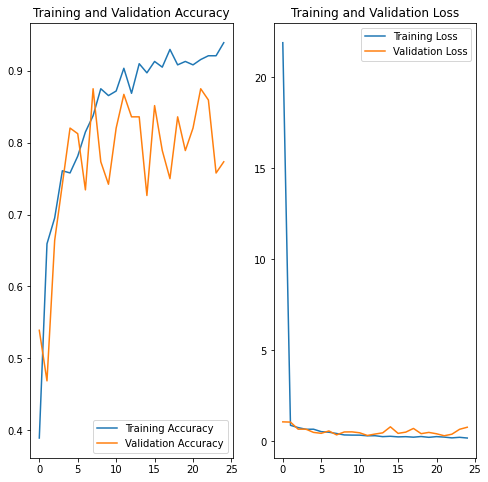

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


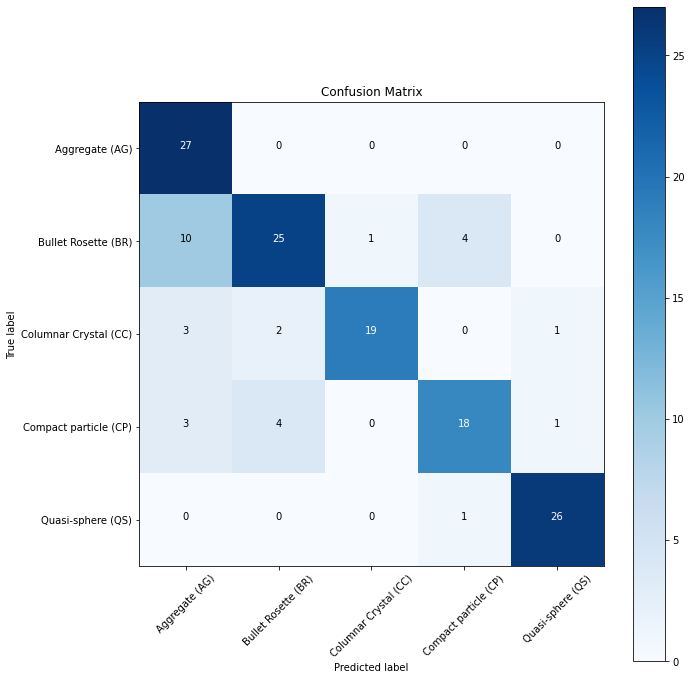

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.63      1.00      0.77        27
  Bullet Rosette (BR)       0.81      0.62      0.70        40
Columnar Crystal (CC)       0.95      0.76      0.84        25
Compact particle (CP)       0.78      0.69      0.73        26
    Quasi-sphere (QS)       0.93      0.96      0.95        27

             accuracy                           0.79       145
            macro avg       0.82      0.81      0.80       145
         weighted avg       0.82      0.79      0.79       145



In [ ]:
#Save the model
model.save("CNN_HVPS.hdf5")

1)VGG16(HVPS)

In [ ]:
import tensorflow as tf

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
pip install split-folders[full]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
input_folder = '/content/airlab/HVPS'

splitfolders.ratio(input_folder, output='HVPS', seed=42, ratio=(.7, .2, .1), group_prefix=None)


Copying files: 1409 files [00:00, 6252.99 files/s]


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train__data_path = '/content/HVPS/train'
valid_data_path = '/content/HVPS/val'
test_data_path = '/content/HVPS/test'

In [ ]:
# Function for plots images with labels 

def plots(ims, figsize=(12,12), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1

    for i in range(len(ims)):
        sp = f.add_subplot(cols, rows, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=12)
        plt.imshow(ims[i], interpolation=None if interp else 'none')


In [ ]:
#Check the training set (with batch of 10 as defined above
imgs, labels = next(train_gen)

/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


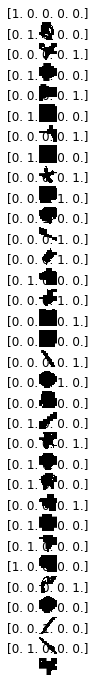

In [ ]:
#Images are shown in the output
plots(imgs, titles=labels)

In [ ]:
#Images Classes with index
print(train_gen.class_indices)


{'Aggregate (AG)': 0, 'Bullet Rosette (BR)': 1, 'Columnar Crystal (CC)': 2, 'Compact particle (CP)': 3, 'Quasi-sphere (QS)': 4}


In [ ]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
 # useful for getting number of output classes
folders = glob('/content/HVPS/train/*')
folders

['/content/HVPS/train/Bullet Rosette (BR)',
 '/content/HVPS/train/Quasi-sphere (QS)',
 '/content/HVPS/train/Aggregate (AG)',
 '/content/HVPS/train/Columnar Crystal (CC)',
 '/content/HVPS/train/Compact particle (CP)']

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [ ]:
prediction = Dense(5 , activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Get summary of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 14s 513ms/step - loss: 4.8021 - accuracy: 0.6867 - val_loss: 2.1010 - val_accuracy: 0.8594
Epoch 2/25
20/20 [==============================] - 9s 436ms/step - loss: 2.4811 - accuracy: 0.8054 - val_loss: 2.8531 - val_accuracy: 0.8281
Epoch 3/25
20/20 [==============================] - 8s 394ms/step - loss: 1.7920 - accuracy: 0.8402 - val_loss: 0.6686 - val_accuracy: 0.9375
Epoch 4/25
20/20 [==============================] - 8s 398ms/step - loss: 2.0746 - accuracy: 0.8497 - val_loss: 1.8716 - val_accuracy: 0.8828
Epoch 5/25
20/20 [==============================] - 8s 394ms/step - loss: 1.6972 - accuracy: 0.8703 - val_loss: 0.8589 - val_accuracy: 0.9453
Epoch 6/25
20/20 [==============================] - 8s 394ms/step - loss: 1.4646 - accuracy: 0.8892 - val_loss: 2.4262 - val_accuracy: 0.8438
Epoch 7/25
20/20 [==============================] - 8s 392ms/step - loss: 1.3148 - accuracy: 0.8908 - val_loss: 2.5597 - val_accuracy: 0.8750
Epoch

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 88.97%
[INFO] Loss:  2.3018171787261963


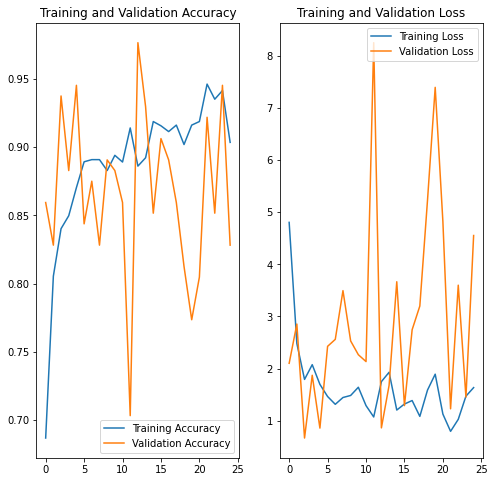

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


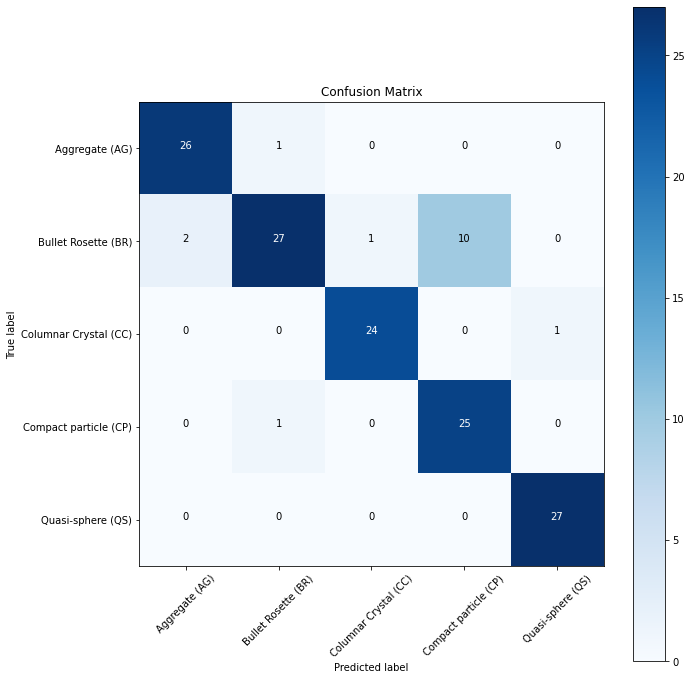

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.93      0.96      0.95        27
  Bullet Rosette (BR)       0.93      0.68      0.78        40
Columnar Crystal (CC)       0.96      0.96      0.96        25
Compact particle (CP)       0.71      0.96      0.82        26
    Quasi-sphere (QS)       0.96      1.00      0.98        27

             accuracy                           0.89       145
            macro avg       0.90      0.91      0.90       145
         weighted avg       0.90      0.89      0.89       145



In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('vgg16HVPS1.hdf5')

VGG19(HVPS)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/airlab/HVPS/train'
valid_path = '/content/airlab/HVPS/val'

In [ ]:
# Import the VGG19 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg19.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('/HVPS/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg19.output)

In [ ]:
prediction = Dense(5 , activation='softmax')(x)

# create a model object
model = Model(inputs=vgg19.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 9s 428ms/step - loss: 7.0513 - accuracy: 0.6172 - val_loss: 4.1032 - val_accuracy: 0.8672
Epoch 2/25
20/20 [==============================] - 8s 413ms/step - loss: 3.4254 - accuracy: 0.8047 - val_loss: 4.4301 - val_accuracy: 0.8125
Epoch 3/25
20/20 [==============================] - 8s 413ms/step - loss: 2.1041 - accuracy: 0.8719 - val_loss: 5.6889 - val_accuracy: 0.8047
Epoch 4/25
20/20 [==============================] - 8s 405ms/step - loss: 1.5324 - accuracy: 0.8877 - val_loss: 6.5629 - val_accuracy: 0.7656
Epoch 5/25
20/20 [==============================] - 8s 408ms/step - loss: 1.5263 - accuracy: 0.8829 - val_loss: 3.6004 - val_accuracy: 0.8672
Epoch 6/25
20/20 [==============================] - 8s 411ms/step - loss: 2.5438 - accuracy: 0.8592 - val_loss: 4.7614 - val_accuracy: 0.8125
Epoch 7/25
20/20 [==============================] - 8s 406ms/step - loss: 1.7045 - accuracy: 0.8892 - val_loss: 4.4126 - val_accuracy: 0.8359
Epoch 

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 16)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 88.28%
[INFO] Loss:  4.144840717315674


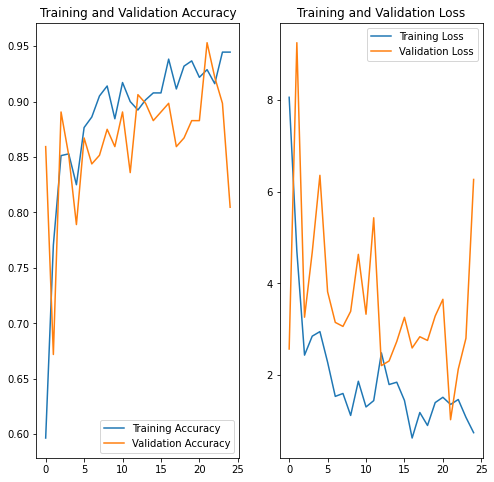

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)


['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


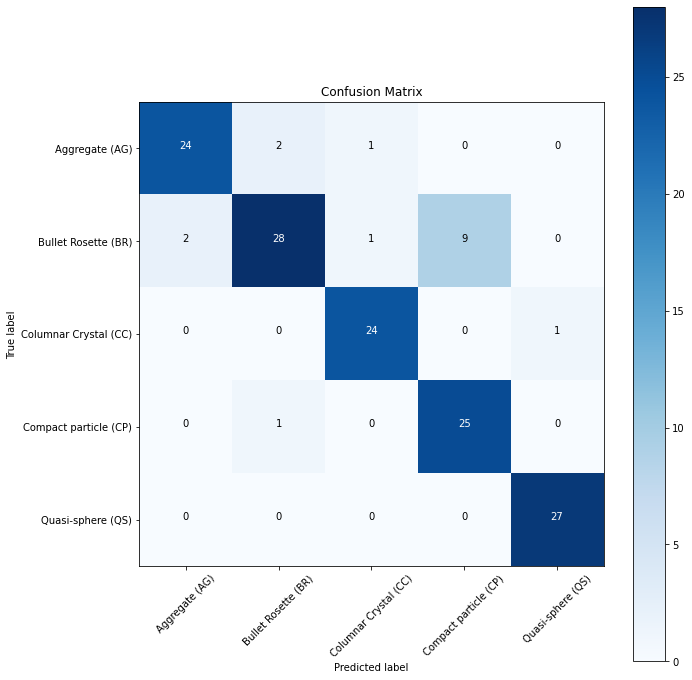

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.92      0.89      0.91        27
  Bullet Rosette (BR)       0.90      0.70      0.79        40
Columnar Crystal (CC)       0.92      0.96      0.94        25
Compact particle (CP)       0.74      0.96      0.83        26
    Quasi-sphere (QS)       0.96      1.00      0.98        27

             accuracy                           0.88       145
            macro avg       0.89      0.90      0.89       145
         weighted avg       0.89      0.88      0.88       145



In [ ]:
#Save the model
model.save("vgg19HVPS1.hdf5")


3)ResNet50(HVPS)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# Import the restnet50 library as shown below and add preprocessing layer to the front of restnet
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [ ]:
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing import image

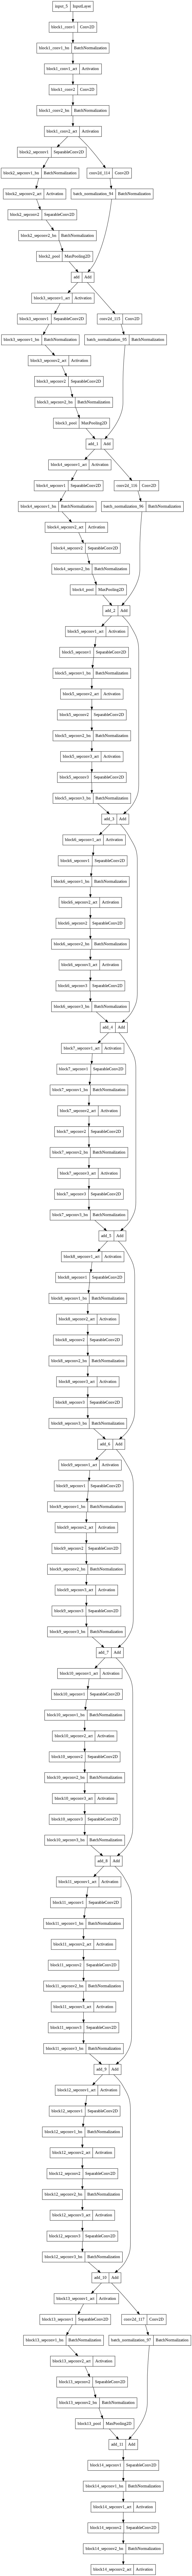

In [ ]:
plot_model(base_model, to_file='restnet50_hvps.jpg')

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 12s 436ms/step - loss: 4.0310 - accuracy: 0.6503 - val_loss: 4.8510 - val_accuracy: 0.7109
Epoch 2/25
20/20 [==============================] - 7s 365ms/step - loss: 2.2509 - accuracy: 0.7991 - val_loss: 2.2927 - val_accuracy: 0.7500
Epoch 3/25
20/20 [==============================] - 7s 367ms/step - loss: 1.4982 - accuracy: 0.8484 - val_loss: 1.2597 - val_accuracy: 0.8672
Epoch 4/25
20/20 [==============================] - 7s 369ms/step - loss: 1.2522 - accuracy: 0.8531 - val_loss: 1.5425 - val_accuracy: 0.8672
Epoch 5/25
20/20 [==============================] - 7s 367ms/step - loss: 1.1154 - accuracy: 0.8484 - val_loss: 1.2477 - val_accuracy: 0.8828
Epoch 6/25
20/20 [==============================] - 8s 372ms/step - loss: 0.8030 - accuracy: 0.8750 - val_loss: 0.8350 - val_accuracy: 0.9453
Epoch 7/25
20/20 [==============================] - 7s 371ms/step - loss: 1.1531 - accuracy: 0.8813 - val_loss: 0.9992 - val_accuracy: 0.9375
Epoch

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 84.83%
[INFO] Loss:  2.0405118465423584


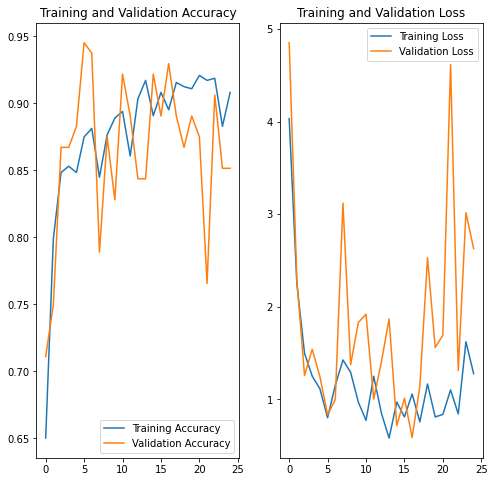

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
##################################################################################################
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


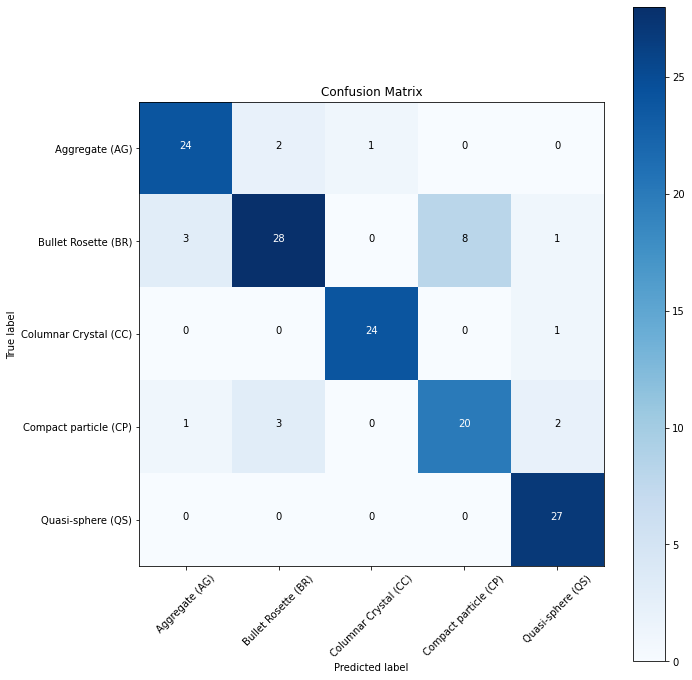

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.86      0.89      0.87        27
  Bullet Rosette (BR)       0.85      0.70      0.77        40
Columnar Crystal (CC)       0.96      0.96      0.96        25
Compact particle (CP)       0.71      0.77      0.74        26
    Quasi-sphere (QS)       0.87      1.00      0.93        27

             accuracy                           0.85       145
            macro avg       0.85      0.86      0.85       145
         weighted avg       0.85      0.85      0.85       145



In [ ]:
#Save the model
model.save("resetHVPS1.hdf5")


Inception V3

In [ ]:
# Import the inception model
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(input_shape = (224, 224, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(pre_trained_model.output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Add a dropout rate of 0.2
#x = layers.Dropout(0.2)(x)                  
# Add a final softmax layer for classification
x = layers.Dense(5, activation='softmax')(x)           

model = Model( pre_trained_model.input, x) 


In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_20[0][0]']              
 alization)                     )                                                           

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 13s 417ms/step - loss: 1122.7629 - accuracy: 0.4156 - val_loss: 57.6519 - val_accuracy: 0.6953
Epoch 2/25
20/20 [==============================] - 7s 359ms/step - loss: 101.4021 - accuracy: 0.7281 - val_loss: 32.0988 - val_accuracy: 0.7891
Epoch 3/25
20/20 [==============================] - 7s 358ms/step - loss: 34.3985 - accuracy: 0.7594 - val_loss: 21.5572 - val_accuracy: 0.6797
Epoch 4/25
20/20 [==============================] - 7s 357ms/step - loss: 23.9868 - accuracy: 0.7406 - val_loss: 14.8691 - val_accuracy: 0.8047
Epoch 5/25
20/20 [==============================] - 9s 465ms/step - loss: 13.6246 - accuracy: 0.7769 - val_loss: 8.9529 - val_accuracy: 0.7891
Epoch 6/25
20/20 [==============================] - 7s 359ms/step - loss: 13.2170 - accuracy: 0.7578 - val_loss: 4.5596 - val_accuracy: 0.9062
Epoch 7/25
20/20 [==============================] - 7s 356ms/step - loss: 15.0721 - accuracy: 0.7753 - val_loss: 7.2092 - val_accuracy

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 86.21%
[INFO] Loss:  3.9822325706481934


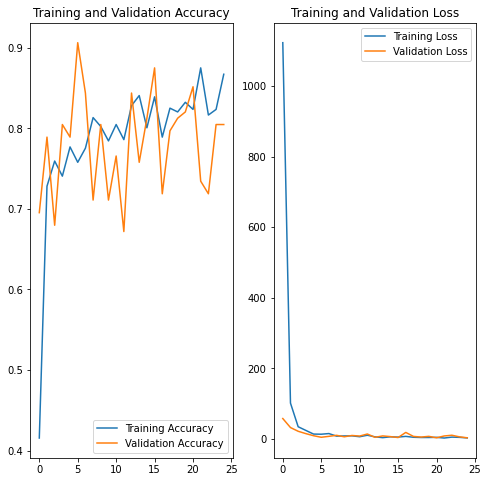

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


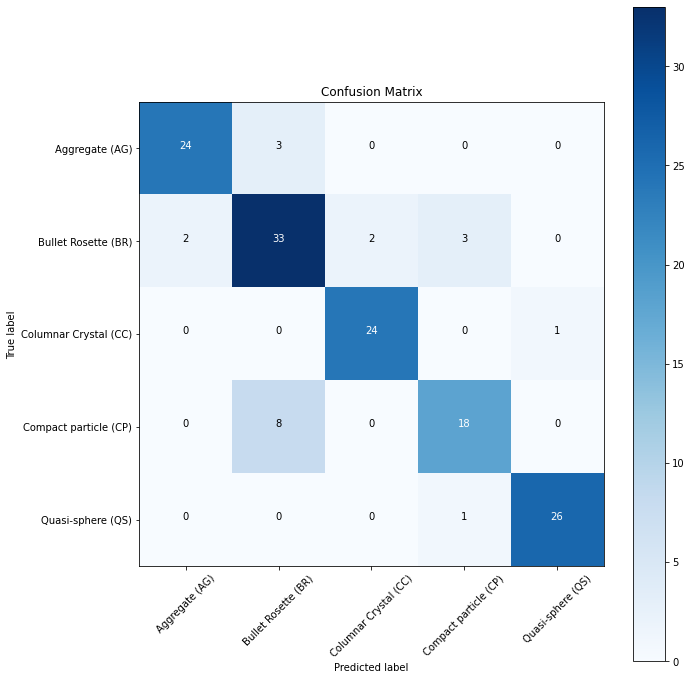

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')

In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.92      0.89      0.91        27
  Bullet Rosette (BR)       0.75      0.82      0.79        40
Columnar Crystal (CC)       0.92      0.96      0.94        25
Compact particle (CP)       0.82      0.69      0.75        26
    Quasi-sphere (QS)       0.96      0.96      0.96        27

             accuracy                           0.86       145
            macro avg       0.88      0.87      0.87       145
         weighted avg       0.86      0.86      0.86       145



In [ ]:
#Save the model
model.save("inceptionHVPS1.hdf5")

EfficientNet

In [ ]:
!pip install efficientnet==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 6.4 MB/s 


In [ ]:
import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
# import the tensorflow.keras version of efficientnet
from efficientnet import tfkeras as efficientnet
import matplotlib.pyplot as plt

In [ ]:
def get_model(input_shape, num_classes):
    base_model = efficientnet.EfficientNetB4(
        weights='imagenet',
        pooling='avg',
        include_top=False,
        input_shape=input_shape
    )
    
    # "Freeze" the base_model layers so that we don't backpropagate through them.
    # This effectively makes base_model a feature extractor.
    for layer in base_model.layers:
        layer.trainable = False

    # Create our own fully-conected top layer with num_classes outputs that takes base_model.output as an input.
    # We use the 'softmax' activation for computing class probabilities.
    x = base_model.output
    predictions = layers.Dense(5, activation='softmax')(x)

    # the Model class packages our architecture into one object
    model = tf.models.Model(inputs=base_model.input, outputs=predictions)
    

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_20 (Conv2D)             (None, 111, 111, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d_20[0][0]']              
 alization)                     )                                                           

In [ ]:
#model = get_model(input_shape=(180, 180, 3), num_classes=5)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 12s 425ms/step - loss: 6.4531 - accuracy: 0.8149 - val_loss: 4.2821 - val_accuracy: 0.8203
Epoch 2/25
20/20 [==============================] - 7s 356ms/step - loss: 6.4721 - accuracy: 0.7937 - val_loss: 2.3541 - val_accuracy: 0.8672
Epoch 3/25
20/20 [==============================] - 7s 358ms/step - loss: 4.7901 - accuracy: 0.7891 - val_loss: 10.0824 - val_accuracy: 0.6641
Epoch 4/25
20/20 [==============================] - 7s 357ms/step - loss: 4.0641 - accuracy: 0.8212 - val_loss: 10.6976 - val_accuracy: 0.7656
Epoch 5/25
20/20 [==============================] - 7s 354ms/step - loss: 2.6989 - accuracy: 0.8244 - val_loss: 1.4583 - val_accuracy: 0.7891
Epoch 6/25
20/20 [==============================] - 7s 351ms/step - loss: 2.0748 - accuracy: 0.8006 - val_loss: 0.6244 - val_accuracy: 0.8125
Epoch 7/25
20/20 [==============================] - 7s 357ms/step - loss: 1.2642 - accuracy: 0.7658 - val_loss: 1.0161 - val_accuracy: 0.7969
Epo

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)
print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 80.00%
[INFO] Loss:  0.5433117747306824


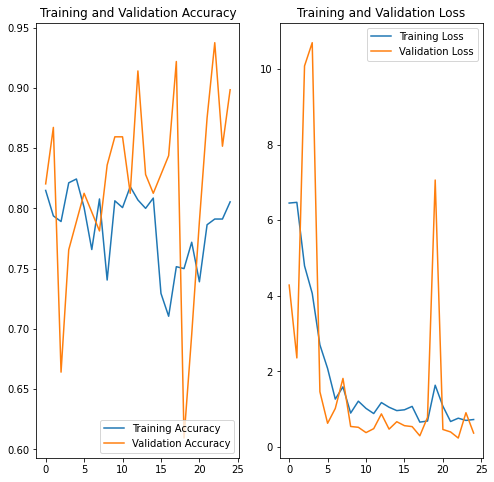

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

print(target_names)

['Aggregate (AG)', 'Bullet Rosette (BR)', 'Columnar Crystal (CC)', 'Compact particle (CP)', 'Quasi-sphere (QS)']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


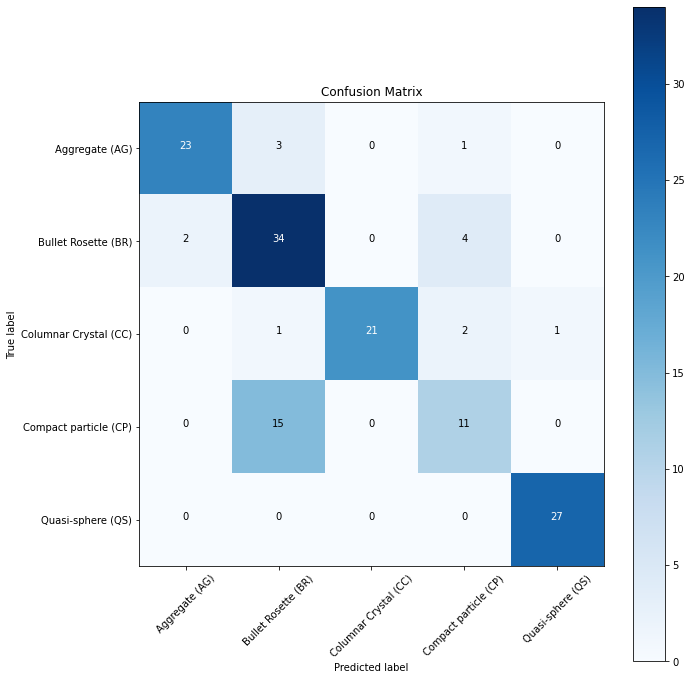

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.92      0.85      0.88        27
  Bullet Rosette (BR)       0.64      0.85      0.73        40
Columnar Crystal (CC)       1.00      0.84      0.91        25
Compact particle (CP)       0.61      0.42      0.50        26
    Quasi-sphere (QS)       0.96      1.00      0.98        27

             accuracy                           0.80       145
            macro avg       0.83      0.79      0.80       145
         weighted avg       0.81      0.80      0.80       145



In [ ]:
#Save the model
model.save("efficientHVPS1.hdf5")

Xception

In [ ]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.models import Sequential

In [ ]:
# Define Input Parameters
shape = (224, 224)
channel = (3, )
input_size = shape + channel

#batch size
batch_size = 32

In [ ]:
from keras.layers.pooling import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
base_model = Xception(include_top=False, weights='imagenet', input_tensor=None, 
                      input_shape=input_size, pooling=max, classes=5,
                      classifier_activation='softmax')

# adding custom layers
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(256, activation='relu'))
#model.add(Dropout(0.5))
model.add(Dense(5, activation = 'softmax'))

base_model.trainable = False

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_2   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_6 (Dense)             (None, 256)               524544    
                                                                 
 dense_7 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 21,387,309
Trainable params: 525,829
Non-trainable params: 20,861,480
_________________________________________________________________


In [ ]:
#model = get_model(input_shape=(180, 180, 3), num_classes=5)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#Train the model
history = model.fit_generator(train_gen, steps_per_epoch=20, validation_data=val_gen, validation_steps=4, epochs=25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
20/20 [==============================] - 11s 423ms/step - loss: 10.0558 - accuracy: 0.4891 - val_loss: 4.7582 - val_accuracy: 0.4609
Epoch 2/25
20/20 [==============================] - 8s 373ms/step - loss: 3.2638 - accuracy: 0.6156 - val_loss: 1.6781 - val_accuracy: 0.6719
Epoch 3/25
20/20 [==============================] - 8s 377ms/step - loss: 1.6224 - accuracy: 0.7281 - val_loss: 0.6280 - val_accuracy: 0.8516
Epoch 4/25
20/20 [==============================] - 8s 381ms/step - loss: 1.6088 - accuracy: 0.6851 - val_loss: 0.8403 - val_accuracy: 0.8281
Epoch 5/25
20/20 [==============================] - 8s 373ms/step - loss: 1.7610 - accuracy: 0.6630 - val_loss: 0.8450 - val_accuracy: 0.8359
Epoch 6/25
20/20 [==============================] - 8s 376ms/step - loss: 1.6199 - accuracy: 0.6851 - val_loss: 1.0743 - val_accuracy: 0.7422
Epoch 7/25
20/20 [==============================] - 8s 373ms/step - loss: 1.2955 - accuracy: 0.7421 - val_loss: 0.4578 - val_accuracy: 0.8594
Epoc

In [ ]:
#Get the accuracy score
test_score = model.evaluate_generator(test_gen, 32)

print("[INFO] accuracy: {:.2f}%".format(test_score[1] * 100)) 
print("[INFO] Loss: ",test_score[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


[INFO] accuracy: 72.41%
[INFO] Loss:  0.7613730430603027


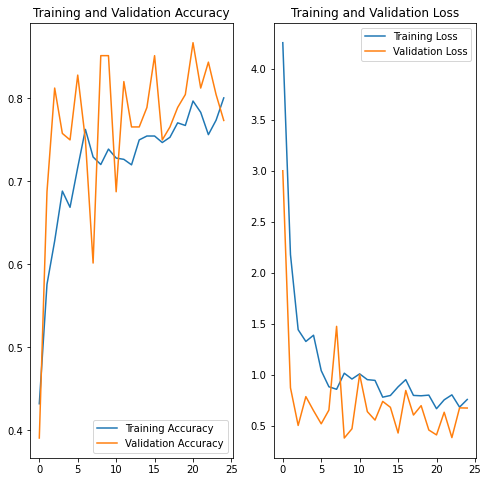

In [ ]:
epochs=25
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Plot the confusion matrix. Set Normalize = True/False

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


In [ ]:
#Print the Target names

target_names = []
for key in train_gen.class_indices:
    target_names.append(key)

# print(target_names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Confusion Matrix
Confusion matrix, without normalization


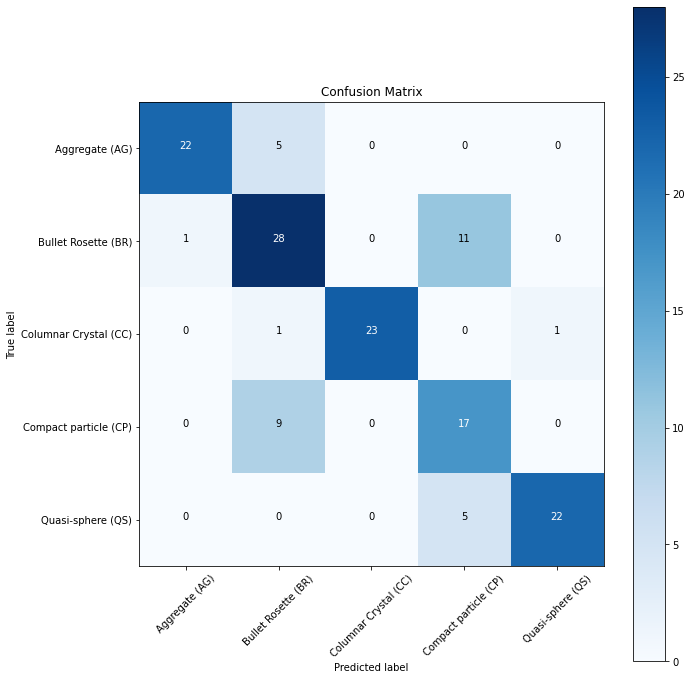

In [ ]:
#Confution Matrix 

Y_pred = model.predict_generator(test_gen)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_gen.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')


In [ ]:
#Print Classification Report
print('Classification Report')
print(classification_report(test_gen.classes, y_pred, target_names=target_names))


Classification Report
                       precision    recall  f1-score   support

       Aggregate (AG)       0.96      0.81      0.88        27
  Bullet Rosette (BR)       0.65      0.70      0.67        40
Columnar Crystal (CC)       1.00      0.92      0.96        25
Compact particle (CP)       0.52      0.65      0.58        26
    Quasi-sphere (QS)       0.96      0.81      0.88        27

             accuracy                           0.77       145
            macro avg       0.82      0.78      0.79       145
         weighted avg       0.80      0.77      0.78       145



In [ ]:
#Save the model
model.save("XceptionHVPS1.hdf5")